In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras import layers
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pré-processamento do dataset

## Organização do dataset

In [6]:
# Load dataset edited
df_train = pd.read_csv("/content/drive/MyDrive/dataset_bank.csv",sep=",")
df_test = pd.read_csv("/content/drive/MyDrive/dataset_bank_test.csv",sep=",")

In [7]:
df_train = df_train.drop(["Unnamed: 0"],axis=1)
df_test = df_test.drop(["Unnamed: 0"],axis=1)

In [8]:
frames = [df_train,df_test]
df = pd.concat(frames)

In [9]:
col_categoric = df.select_dtypes("object")

In [10]:
col = df.select_dtypes("object")

for i in col:
  label_encoder = preprocessing.LabelEncoder()
  df[i] = label_encoder.fit_transform(df[i])

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,9,1,2,0,16,1,0,0,5,8,43,5,-1,0,3,0
1,35,1,1,1,0,262,0,0,0,15,11,331,1,75,6,0,1
2,49,4,1,2,0,53,0,0,0,12,1,134,6,-1,0,3,0
3,53,7,1,1,0,1065,0,1,0,24,5,211,1,-1,0,3,0
4,42,9,2,1,0,25,1,0,0,21,1,148,1,-1,0,3,0


In [12]:
df['y'].value_counts() 

0    39922
1     5289
Name: y, dtype: int64

## Normalização dos dados

In [13]:
X = df.drop(['y'], axis=1)
y = df['y']

In [14]:
X_scaled = StandardScaler().fit_transform(X)

In [15]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Machine Learning

## Teste Modelo

In [16]:
h = (20,50)
f = "relu"
s = "adam"
a = 0.1
m = 500

In [20]:
model1 = MLPClassifier(hidden_layer_sizes=h, activation=f, solver=s, alpha=a, max_iter=m, random_state=42)

In [21]:
model1.fit(train_x, train_y)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 50), max_iter=500,
              random_state=42)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8016
           1       0.61      0.39      0.47      1027

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



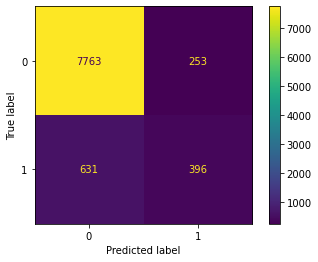

In [23]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

pred_y = model1.predict(test_x)
report = metrics.classification_report(test_y, pred_y, 
                                       target_names=['0','1'])
print(report)

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

## Teste Modelo com downsample

### Balanceamento dos dados com downsample



In [24]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [25]:
label0 = df[df['y'] == 0]
label1 = df[df['y'] == 1]

In [26]:
from sklearn.utils import resample
df_downsampled = resample(label0,
                          replace=False,
                          n_samples=5289,
                          random_state=42)

In [27]:
df_resample = pd.concat([label1, df_downsampled])

In [28]:
df_resample['y'].value_counts()

1    5289
0    5289
Name: y, dtype: int64

### Pré-processamento dos dados

In [29]:
X = df_resample.drop(['y'], axis=1)
y = df_resample['y']

In [30]:
X_scaled = StandardScaler().fit_transform(X)

In [31]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo

In [32]:
h = (20,50)
f = "relu"
s = "adam"
a = 0.1
m = 1000

In [33]:
model2 = MLPClassifier(hidden_layer_sizes=h, activation=f, solver=s, alpha=a, max_iter=m, random_state=42, verbose=True)

In [34]:
model2.fit(train_x, train_y)

Iteration 1, loss = 0.64953078
Iteration 2, loss = 0.54039016
Iteration 3, loss = 0.47746572
Iteration 4, loss = 0.44759090
Iteration 5, loss = 0.43593569
Iteration 6, loss = 0.42967916
Iteration 7, loss = 0.42473312
Iteration 8, loss = 0.42133330
Iteration 9, loss = 0.41831416
Iteration 10, loss = 0.41566284
Iteration 11, loss = 0.41357545
Iteration 12, loss = 0.41093176
Iteration 13, loss = 0.40952905
Iteration 14, loss = 0.40736549
Iteration 15, loss = 0.40595211
Iteration 16, loss = 0.40459683
Iteration 17, loss = 0.40314665
Iteration 18, loss = 0.40180124
Iteration 19, loss = 0.40053556
Iteration 20, loss = 0.39925822
Iteration 21, loss = 0.39868801
Iteration 22, loss = 0.39742480
Iteration 23, loss = 0.39687593
Iteration 24, loss = 0.39586654
Iteration 25, loss = 0.39443382
Iteration 26, loss = 0.39360580
Iteration 27, loss = 0.39224969
Iteration 28, loss = 0.39156194
Iteration 29, loss = 0.39134696
Iteration 30, loss = 0.39022881
Iteration 31, loss = 0.38888433
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 50), max_iter=1000,
              random_state=42, verbose=True)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1024
           1       0.81      0.83      0.82      1092

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



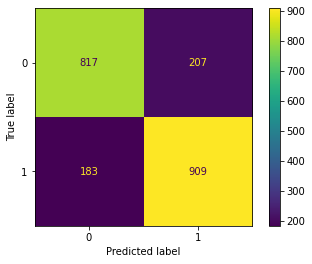

In [35]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

pred_y = model2.predict(test_x)

report = metrics.classification_report(test_y, pred_y, 
                                       target_names=['0','1'])
print(report)

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

## Teste Modelo com upsample

### Divisão dos dados em treino e teste

In [36]:
X = df.drop(['y'], axis=1)
y = df['y']

In [37]:
X_scaled = StandardScaler().fit_transform(X)

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Upsample just train data

In [39]:
df_train = pd.DataFrame(np.column_stack([train_x, train_y]))

In [40]:
df_train[16].value_counts()

0.0    31906
1.0     4262
Name: 16, dtype: int64

In [41]:
label0 = df_train[df_train[16] == 0]
label1 = df_train[df_train[16] == 1]

df_upsampled = resample(label1,
                          replace=True,
                          n_samples=31906,
                          random_state=42)

In [42]:
df_train_resample = pd.concat([df_upsampled, label0])

In [43]:
df_train_resample[16].value_counts()

1.0    31906
0.0    31906
Name: 16, dtype: int64

In [44]:
train_x = df_train_resample.drop([16], axis=1).to_numpy()
train_y = df_train_resample[[16]].to_numpy()

### Modelo

In [45]:
h = (20,50)
f = "relu"
s = "adam"
a = 0.1
m = 500

In [ ]:
model3 = MLPClassifier(hidden_layer_sizes=h, activation=f, solver=s, alpha=a, max_iter=m, random_state=42)

In [ ]:
model3.fit(train_x, train_y)

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

pred_y = model3.predict(test_x)

report = metrics.classification_report(test_y, pred_y, 
                                       target_names=['0','1'])
print(report)

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

## Teste Modelo com downsample e upsample

### Balanceamento dos dados com downsample



In [ ]:
df['y'].value_counts()

In [ ]:
label0 = df[df['y'] == 0]
label1 = df[df['y'] == 1]

In [ ]:
from sklearn.utils import resample
df_downsampled = resample(label0,
                          replace=False,
                          n_samples=10000,
                          random_state=42)

In [ ]:
df_resample = pd.concat([label1, df_downsampled])

In [ ]:
df_resample['y'].value_counts()

### Division of data into train and test

In [ ]:
X = df_resample.drop(['y'], axis=1)
y = df_resample['y']

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Upsample just train data

In [ ]:
df_train = pd.DataFrame(np.column_stack([train_x, train_y]))

In [ ]:
df_train[16].value_counts()

In [ ]:
label0 = df_train[df_train[16] == 0]
label1 = df_train[df_train[16] == 1]

df_upsampled = resample(label1,
                          replace=True,
                          n_samples=8012,
                          random_state=42)

In [ ]:
df_train_resample = pd.concat([df_upsampled, label0])

In [ ]:
df_train_resample[16].value_counts()

In [ ]:
train_x = df_train_resample.drop([16], axis=1).to_numpy()
train_y = df_train_resample[[16]].to_numpy()

### Modelo

In [ ]:
h = (20,50)
f = "relu"
s = "adam"
a = 0.1
m = 500

In [ ]:
model4 = MLPClassifier(hidden_layer_sizes=h, activation=f, solver=s, alpha=a, max_iter=m, random_state=42)

In [ ]:
model4.fit(train_x, train_y)

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

pred_y = model4.predict(test_x)

report = metrics.classification_report(test_y, pred_y, 
                                       target_names=['0','1'])
print(report)

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

## Teste Modelo com downsample e tuning of parameters

### Balanceamento dos dados com downsample



In [ ]:
df['y'].value_counts()

In [ ]:
label0 = df[df['y'] == 0]
label1 = df[df['y'] == 1]

In [ ]:
from sklearn.utils import resample
df_downsampled = resample(label0,
                          replace=False,
                          n_samples=5289,
                          random_state=42)

In [ ]:
df_resample = pd.concat([label1, df_downsampled])

In [ ]:
df_resample['y'].value_counts()

### Pré-processamento dos dados

In [ ]:
X = df_resample.drop(['y'], axis=1)
y = df_resample['y']

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier(hidden_layer_sizes=(20,50), activation='relu', solver='adam', alpha=0.1, max_iter=1000, random_state=42)

# Every combination you want to try
params = {
    'hidden_layer_sizes' : [(20,50), (50, 60), (20, 30, 40)], 
    'activation' : ['relu', 'tanh'], 
    'alpha' : [0.1, 0.01]
}

gscv = GridSearchCV(clf, params, verbose=1)

gscv.fit(np.array(train_x), np.array(train_y))
print(gscv.best_params_) 

pred_y = gscv.predict(test_x)

report = metrics.classification_report(test_y, pred_y, target_names=['0','1'])
print(report)

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()

## Teste Modelo com downsample e tuning of parameters

### Balanceamento dos dados com downsample



In [ ]:
df['y'].value_counts()

In [ ]:
label0 = df[df['y'] == 0]
label1 = df[df['y'] == 1]

In [ ]:
from sklearn.utils import resample
df_downsampled = resample(label0,
                          replace=False,
                          n_samples=5289,
                          random_state=42)

In [ ]:
df_resample = pd.concat([label1, df_downsampled])

In [ ]:
df_resample['y'].value_counts()

### Pré-processamento dos dados

In [ ]:
X = df_resample.drop(['y'], axis=1)
y = df_resample['y']

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = MLPClassifier(hidden_layer_sizes=(20,50), activation='relu', solver='adam', alpha=0.1, max_iter=1000, random_state=42)

# Every combination you want to try
params = {
    'hidden_layer_sizes' : [(20,50), (50, 60), (20, 30, 40)], 
    'activation' : ['relu', 'tanh'], 
    'alpha' : [0.1, 0.01]
}

gscv = GridSearchCV(clf, params, verbose=1)

gscv.fit(np.array(train_x), np.array(train_y))
print(gscv.best_params_) 

pred_y = gscv.predict(test_x)

report = metrics.classification_report(test_y, pred_y, target_names=['0','1'])
print(report)

ConfusionMatrixDisplay.from_predictions(test_y, pred_y)
plt.show()